# Домашнее задание
## Пантюх Катерина

In [ ]:
# ЗАДАНИЕ:
# Использовать датасет из эфира
# Использовать random_state = 42
# 1. Документация по sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network
# 2. Подобрать параметры для MLPRegressor, чтобы ошибка (MAE) была ниже чем в эфире
# 3. Выбрать из sklearn 3 (ТРИ) других модели регрессии (которые мы еще не использовали), 
# обучить и добиться наименьшей ошибки
# Критерием оценки ДЗ НЕ является самая минимальна ошибка.
# 4. Оформить результат в виде HTML (File->Download as -> HTML), в файле должны быть:
# — Комментарии
# — Графики (https://matplotlib.org/gallery/index.html)
# — Выводы

In [9]:
# подключаем нужные бибиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
import statistics

cb = '#668fac'
co = '#f8a867'
cg = '#a7c86a'
cr = '#f1808b'
cbl = '#737373'
cy = '#ffd11a'

In [6]:
# подгружаем данные
inp = pd.read_excel('input/usd_rates.xlsx')
inp.head(2)

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США


(array([736299., 736420., 736542., 736664., 736785., 736907., 737029.,
        737150., 737272., 737394.]), <a list of 10 Text xticklabel objects>)

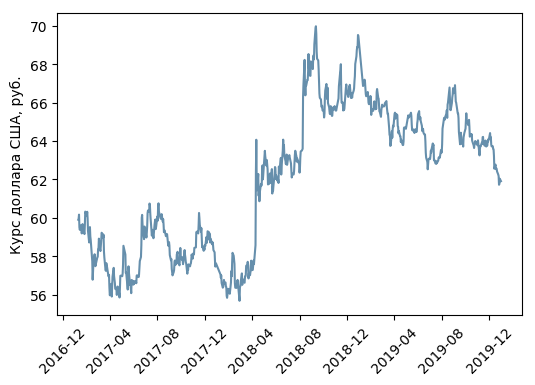

In [20]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(inp.data, inp.curs, color = cb)
plt.ylabel("Курс доллара США, руб.")
plt.xticks(rotation=45)

# MLP подготовка данных

In [25]:
# подготовка данных
trange = 7
tb = []
past_col = []
futr_col = []

for i in range(trange,len(inp)-trange):
    t = (inp.curs[(i-trange):(i+trange)])
    tb.append(list(t))

for i in range(trange):
    past_col.append(f'past_{i}')
    futr_col.append(f'futr_{i}')

data = pd.DataFrame(tb, columns = (past_col+futr_col))
data.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,futr_0,futr_1,futr_2,futr_3,futr_4,futr_5,futr_6
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196,60.1618
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196,60.1618,60.0851
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196,60.1618,60.0851,60.3099


## Определяем размер ошибки в примере из урока (для модели MLP)

Средняя ошибка по всем значениям тестовой выборки: 1.03788254894003


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text xticklabel objects>)

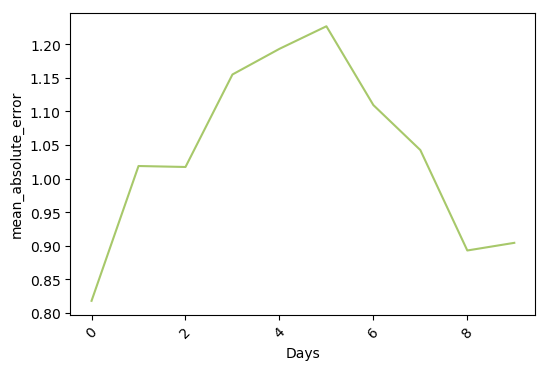

In [71]:
# Разбиваем на тестовую и обучающую выборки
#print(len(data))
k=10
# Test set
X = data[past_col][:-k]
Y = data[futr_col][:-k]
# Training set
Xt = data[past_col][-k:]
Yt = data[futr_col][-k:]

# Обучаем модель
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=2000, random_state=42)
MLP.fit(X,Y)

# проверяем ошибку
err = []
days = []

for i in range(10):
    prediction = MLP.predict([Xt.iloc[i]])
    e = mean_absolute_error(prediction[0], Yt.iloc[i])
    err.append(e)
    days.append(i)

print(f'Средняя ошибка по всем значениям тестовой выборки: {statistics.mean(err)}')
    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(days, err, color = cg)
plt.ylabel("mean_absolute_error")
plt.xlabel("Days")
plt.xticks(rotation=45)

## Подбираем параметры MLP, чтобы средняя ошибка тестовой вборки была < 1,04

In [ ]:
# Вариант №1. Изменяем количество примеров в тестовой и обучающей выборке

Средняя ошибка по всем значениям тестовой выборки: 1.03788254894003
Средняя ошибка по всем значениям тестовой выборки: 1.0131507986441786
Средняя ошибка по всем значениям тестовой выборки: 1.3335616560922103
Средняя ошибка по всем значениям тестовой выборки: 1.2886771323609483
Средняя ошибка по всем значениям тестовой выборки: 0.9273213029749057
Средняя ошибка по всем значениям тестовой выборки: 0.7575916110227582
Средняя ошибка по всем значениям тестовой выборки: 0.639412670205081
Средняя ошибка по всем значениям тестовой выборки: 0.6063303277913461
Средняя ошибка по всем значениям тестовой выборки: 0.47549476461701534
Средняя ошибка по всем значениям тестовой выборки: 0.3873129485652127
Средняя ошибка по всем значениям тестовой выборки: 0.3324382546787155
Средняя ошибка по всем значениям тестовой выборки: 0.2385822948781406
Средняя ошибка по всем значениям тестовой выборки: 0.20357253612868778
Средняя ошибка по всем значениям тестовой выборки: 0.19839693079102674
Средняя ошибка по вс

Text(0.5,0,'Количество примеров в выборке')

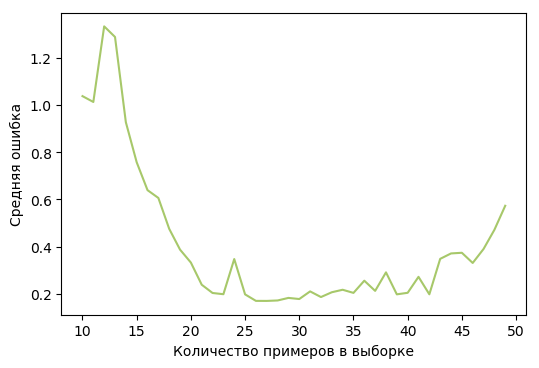

In [86]:
v1 = []
k1 = []
for k in range(10,50):
    
    # Разбиваем на тестовую и обучающую выборки
    #print(len(data))

    # Test set
    X = data[past_col][:-k]
    Y = data[futr_col][:-k]
    # Training set
    Xt = data[past_col][-k:]
    Yt = data[futr_col][-k:]

    # Обучаем модель
    MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=2000, random_state=42)
    MLP.fit(X,Y)

    # проверяем ошибку
    err = []
    days = []

    for i in range(10):
        prediction = MLP.predict([Xt.iloc[i]])
        e = mean_absolute_error(prediction[0], Yt.iloc[i])
        err.append(e)
        days.append(i)

    print(f'Средняя ошибка по всем значениям тестовой выборки: {statistics.mean(err)}')
    v1.append(statistics.mean(err))
    k1.append(k)

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(k1,v1, color = cg)
plt.ylabel("Средняя ошибка")
plt.xlabel("Количество примеров в выборке")
#plt.xticks(rotation=45)

In [120]:
print('Вывод:'+'\n')
print(f'При увеличении примеров в выборках ошибка сначала растет и достигает максимума при {k1[v1.index(max(v1))]} примерах, потом падает и достигаемт минимума {k1[v1.index(min(v1))]} примерах, протом опять растет.')
print(f'При использовании 27 примеров в выборках средняя ошибка = {min(v1)}'+'\n')
print(f'Задание выполнено. При добавлении в выборки по 27 примеров, средняя ошибка меньше чем на уроке.')

Вывод:

При увеличении примеров в выборках ошибка сначала растет и достигает максимума при 12 примерах, потом падает и достигаемт минимума 27 примерах, протом опять растет.
При использовании 27 примеров в выборках средняя ошибка = 0.1699724253443715

Задание выполнено. При добавлении в выборки по 27 примеров, средняя ошибка меньше чем на уроке.


## Выбрать из sklearn 3 других модели регрессии (которые мы еще не использовали), обучить и добиться наименьшей ошибки

У нас были модели:
    RandomForestClassifier
    LinearRegression
    KNeighborsRegressor
    MLPRegressor
    
Выбираем еще три модели:
    DecisionTreeRegressor
    Ridge
    RandomForestRegressor

## DecisionTreeRegressor модель

In [157]:
from sklearn.tree import DecisionTreeRegressor
#берем 
k = 27
# Test set
X = data[past_col][:-k]
Y = data[futr_col][:-k]
# Training set
Xt = data[past_col][-k:]
Yt = data[futr_col][-k:]


Max Depth 1, err 0.9560795815295561
Max Depth 2, err 0.8180524979673303
Max Depth 3, err 0.7318915040438233
Max Depth 4, err 0.6781383479258298
Max Depth 5, err 0.6390282127687728
Max Depth 6, err 0.6084106910862292
Max Depth 7, err 0.580285692861921
Max Depth 8, err 0.5555153304805639
Max Depth 9, err 0.5334036769882866
Max Depth 10, err 0.5146023927681463
Max Depth 11, err 0.49917075623756935
Max Depth 12, err 0.486048672839688
Max Depth 13, err 0.47545510747187203
Max Depth 14, err 0.46707646330232044
Max Depth 15, err 0.46047418367366966
Max Depth 16, err 0.4552460110509953
Max Depth 17, err 0.4511320554981284
Max Depth 18, err 0.4479000467851013
Max Depth 19, err 0.4453683637653942
Max Depth 20, err 0.443397746731274
Max Depth 21, err 0.44188011617154654
Max Depth 22, err 0.44073067855088555
Max Depth 23, err 0.43988225942718207
Max Depth 24, err 0.4392811740223835


Text(0.5,0,'Максимальная глубина')

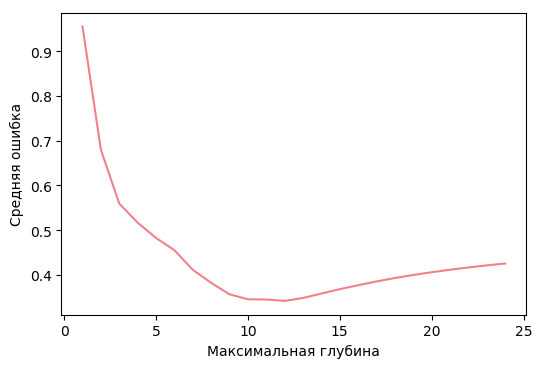

In [207]:
# Обучаем модель
emd = []
emdM = []
md_calc = []

for md in range(1,25):
    DTR = DecisionTreeRegressor(random_state=42, max_depth = md).fit(X,Y)
    
    for i in range(10):
        prediction = DTR.predict([Xt.iloc[i]])
        e = mean_absolute_error(prediction[0], Yt.iloc[i])
        emd.append(e)
    eM = statistics.mean(emd)

    emdM.append(eM)
    md_calc.append(md)
    print(f'Max Depth {md}, err {statistics.mean(emdM)}')

    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(md_calc,emdM, color = cr)
plt.ylabel("Средняя ошибка")
plt.xlabel("Максимальная глубина")

In [210]:
print('Вывод:'+'\n')
print(f'Минимальная ошибка при ограничении максимальной глубины дерева в {md_calc[emdM.index(min(emdM))]}')
print(f'Минимальная средняя ошибка = {min(emdM)}, это хуже чем при использовании модели MLP'+'\n')

Вывод:

Минимальная ошибка при ограничении максимальной глубины дерева в 12
Минимальная средняя ошибка = 0.341705755462993, это хуже чем при использовании модели MLP



## Ridge модель

In [140]:
from sklearn.linear_model import Ridge

k = 27
# Test set
X = data[past_col][:-k]
Y = data[futr_col][:-k]
# Training set
Xt = data[past_col][-k:]
Yt = data[futr_col][-k:]


Text(0.5,0,'Solver type')

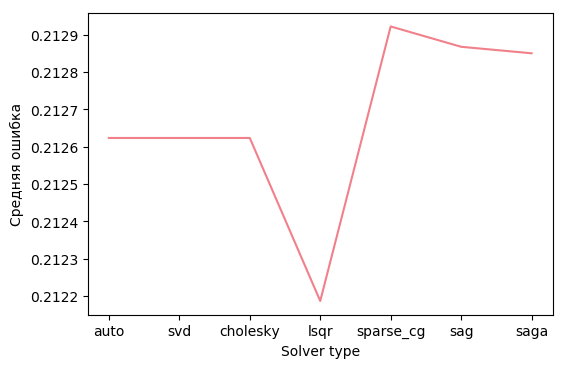

In [184]:
# Обучаем модель
eal = []
ealM = []
al_calc = []

tp = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

for al in tp:
    Rg = Ridge(random_state=42, solver=al).fit(X,Y)
    
    for i in range(10):
        prediction = Rg.predict([Xt.iloc[i]])
        e = mean_absolute_error(prediction[0], Yt.iloc[i])
        eal.append(e)
    eM = statistics.mean(eal)

    ealM.append(eM)
    al_calc.append(al)
    #print(f'Alfa {al}, err {statistics.mean(ealM)}')

    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(al_calc,ealM, color = cr)
plt.ylabel("Средняя ошибка")
plt.xlabel("Solver type")

In [214]:
print('Вывод:'+'\n')
print(f'Минимальная ошибка при варианте решения {al_calc[ealM.index(min(ealM))]}, но разница небольшая.')
print(f'Минимальная средняя ошибка = {min(ealM)}')
print(f'это хуже чем при использовании модели MLP, но лучше чем при использовани модели DecisionTreeRegressor'+'\n')

Вывод:

Минимальная ошибка при варианте решения lsqr, но разница небольшая.
Минимальная средняя ошибка = 0.2121871579186392
это хуже чем при использовании модели MLP, но лучше чем при использовани модели DecisionTreeRegressor



## RandomForestRegressor модель

In [181]:
from sklearn.ensemble import RandomForestRegressor
import numpy

k = 27
# Test set
X = data[past_col][:-k]
Y = data[futr_col][:-k]
# Training set
Xt = data[past_col][-k:]
Yt = data[futr_col][-k:]

Text(0.5,0,'Number Estimations')

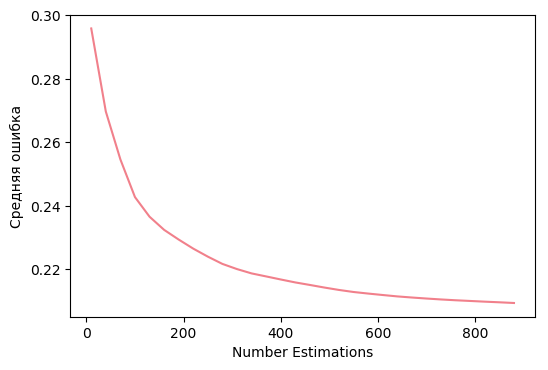

In [219]:
# Обучаем модель
eNE = []
eNeM = []
ne_calc = []

for nEst in numpy.arange(10, 900, 30):
    RFR = RandomForestRegressor(random_state=42, n_estimators=nEst, n_jobs=-1).fit(X,Y)
    
    for i in range(10):
        prediction = RFR.predict([Xt.iloc[i]])
        e = mean_absolute_error(prediction[0], Yt.iloc[i])
        eNE.append(e)
    eM = statistics.mean(eNE)

    eNeM.append(eM)
    ne_calc.append(nEst)

    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(ne_calc,eNeM, color = cr)
plt.ylabel("Средняя ошибка")
plt.xlabel("Number Estimations")

In [217]:
print('Вывод:'+'\n')
print(f'Минимальная ошибка при количестве измерений {ne_calc[eNeM.index(min(eNeM))]}, но разница небольшая.')
print(f'Минимальная средняя ошибка = {min(eNeM)}')
print(f'это хуже чем при использовании модели MLP, примерно сравнимос молелью Ridge'+'\n')

Вывод:

Минимальная ошибка при количестве измерений 880, но разница небольшая.
Минимальная средняя ошибка = 0.20941887742390958
это хуже чем при использовании модели MLP, примерно сравнимос молелью Ridge



## Общий вывод

In [218]:
print('Из рассмотренных моделей лучше всего себя показала модель MLP'+'\n')

Из рассмотренных моделей лучше всего себя показала модель MLP

